In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets    # Importer le module de jeu de données en ligne
from sklearn.neighbors import KNeighborsClassifier     # Importer le module d'algorithme KNN
from sklearn.cluster import KMeans                     # Importer le module d'algorithme KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn import decomposition

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_big = pd.read_csv("Desktop\\OpenClassRoom\\Базы_данных\\openfoodfacts\\openfoodfacts.csv", sep='\t', low_memory=False)
df_big.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Sélection de variables pour une application

df=df_big[['code','product_name', 'countries', 'additives_n', 'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 
        'nutrition-score-fr_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'polyunsaturated-fat_100g',
        'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b1_100g','vitamin-b2_100g', 
        'vitamin-b9_100g', 'calcium_100g', 'potassium_100g', 'magnesium_100g', 'phosphorus_100g',  
        'cholesterol_100g', 'fiber_100g']]
df=df.dropna(axis=0, how='all')

In [4]:
# Suppression des doublons

df=df.drop_duplicates(keep=False)

In [5]:
# Afficher les doublons de la variable "code"

df_dupl=df.loc[df['code'].duplicated(keep=False), :]
df_dupl.head(50)


,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
189068,NaN,"Belgique,France","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,"Belgique,France,Suisse","en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.156,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189248,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189250,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189260,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Suppression des lignes erronées

erreur = ['Belgique,France', 'France,Suisse', 'France', 'Belgique,France,Suisse']

In [7]:
mask =~df['product_name'].isin(erreur)
df=df.loc[mask]
df.head()

,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
0,0000000003087,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),US,0.0,0.0,d,14.0,3.57,14.29,28.57,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.018,3.6
2,0000000004559,Peanuts,US,0.0,0.0,b,0.0,17.86,17.86,17.86,...,NaN,NaN,NaN,NaN,0.071,NaN,NaN,NaN,0.000,7.1
3,0000000016087,Organic Salted Nut Mix,US,0.0,0.0,d,12.0,17.86,3.57,57.14,...,NaN,NaN,NaN,NaN,0.143,NaN,NaN,NaN,NaN,7.1
4,0000000016094,Organic Polenta,US,0.0,0.0,NaN,NaN,8.57,NaN,1.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7


In [8]:
erreur2=[np.nan]

In [9]:
mask =~df['code'].isin(erreur)
df=df.loc[mask]
df.head()

,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
0,0000000003087,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),US,0.0,0.0,d,14.0,3.57,14.29,28.57,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.018,3.6
2,0000000004559,Peanuts,US,0.0,0.0,b,0.0,17.86,17.86,17.86,...,NaN,NaN,NaN,NaN,0.071,NaN,NaN,NaN,0.000,7.1
3,0000000016087,Organic Salted Nut Mix,US,0.0,0.0,d,12.0,17.86,3.57,57.14,...,NaN,NaN,NaN,NaN,0.143,NaN,NaN,NaN,NaN,7.1
4,0000000016094,Organic Polenta,US,0.0,0.0,NaN,NaN,8.57,NaN,1.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7


In [10]:
# Supprimer les lignes vides

df=df.dropna(axis=0, how='all')  

In [11]:
df=df.dropna(axis=0, subset=['product_name'])

In [12]:
# Il y a des valeurs négatives dans la base de données qui sont clairement une erreur. Changer leurs valeurs en NaN

df['proteins_100g'][df['proteins_100g'] < 0] = np.nan
df['sugars_100g'][df['sugars_100g'] < 0] = np.nan
df['vitamin-a_100g'][df['vitamin-a_100g'] < 0] = np.nan
df['fiber_100g'][df['fiber_100g'] < 0] = np.nan
df['vitamin-c_100g'][df['vitamin-c_100g'] < 0] = np.nan

In [13]:
# Il y a aussi des valeurs aberrante. On les remplace aussi par NaN

df['proteins_100g'][df['proteins_100g'] > 100] = np.nan
df['sugars_100g'][df['sugars_100g'] > 100] = np.nan
df['fat_100g'][df['fat_100g'] > 100] = np.nan
df['saturated-fat_100g'][df['saturated-fat_100g'] > 100] = np.nan
df['vitamin-a_100g'][df['vitamin-a_100g'] > 0.030] = np.nan
df['vitamin-b2_100g'][df['vitamin-b2_100g'] > 3] = np.nan
df['vitamin-b9_100g'][df['vitamin-b9_100g'] > 3] = np.nan
df['calcium_100g'][df['calcium_100g'] > 5] = np.nan
df['magnesium_100g'][df['magnesium_100g'] > 3] = np.nan
df['phosphorus_100g'][df['phosphorus_100g'] > 2] = np.nan
df['cholesterol_100g'][df['cholesterol_100g'] > 3] = np.nan
df['potassium_100g'][df['potassium_100g'] > 5] = np.nan
df['fiber_100g'][df['fiber_100g'] > 100] = np.nan
df['vitamin-c_100g'][df['vitamin-c_100g'] > 1] = np.nan
df['vitamin-b6_100g'][df['vitamin-b6_100g'] > 3] = np.nan
df['vitamin-b1_100g'][df['vitamin-b1_100g'] > 2] = np.nan
df['vitamin-pp_100g'][df['vitamin-pp_100g'] > 0.2] = np.nan

<ipython-input-13-7471eae7f141>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proteins_100g'][df['proteins_100g'] > 100] = np.nan
<ipython-input-13-7471eae7f141>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sugars_100g'][df['sugars_100g'] > 100] = np.nan
<ipython-input-13-7471eae7f141>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vitamin-a_100g'][df['vitamin-a_100g'] > 0.030] = np.nan
<ipython-input-13-7471eae7f1

In [14]:
df['polyunsaturated-fat_100g'][df['polyunsaturated-fat_100g'] > 90] = np.nan

In [15]:
df_no_nan=df.dropna(axis=0, subset=['proteins_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['additives_n'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['ingredients_from_palm_oil_n'])

In [16]:
df_no_nan=df_no_nan.dropna(axis=0, subset=['fat_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['sugars_100g'])

In [17]:
df_no_nan=df_no_nan.dropna(axis=0, subset=['saturated-fat_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['nutrition-score-fr_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['fiber_100g'])
df_no_nan=df_no_nan.drop(['vitamin-b9_100g','magnesium_100g', 'phosphorus_100g', 'vitamin-b6_100g'], axis=1)

In [18]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169692 entries, 1 to 320768
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         169692 non-null  object 
 1   product_name                 169692 non-null  object 
 2   countries                    169673 non-null  object 
 3   additives_n                  169692 non-null  float64
 4   ingredients_from_palm_oil_n  169692 non-null  float64
 5   nutrition_grade_fr           169692 non-null  object 
 6   nutrition-score-fr_100g      169692 non-null  float64
 7   proteins_100g                169692 non-null  float64
 8   sugars_100g                  169692 non-null  float64
 9   fat_100g                     169692 non-null  float64
 10  saturated-fat_100g           169692 non-null  float64
 11  polyunsaturated-fat_100g     19398 non-null   float64
 12  vitamin-a_100g               130036 non-null  float64
 13 

In [19]:
df_no_nan=df_no_nan.dropna(axis=0, subset=['cholesterol_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['calcium_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['vitamin-a_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['vitamin-c_100g'])


In [20]:
df_no_nan=df_no_nan.drop(['polyunsaturated-fat_100g', 'vitamin-pp_100g', 'vitamin-b1_100g', 'vitamin-b2_100g','potassium_100g'],
                  axis=1)

In [21]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128557 entries, 1 to 320768
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         128557 non-null  object 
 1   product_name                 128557 non-null  object 
 2   countries                    128557 non-null  object 
 3   additives_n                  128557 non-null  float64
 4   ingredients_from_palm_oil_n  128557 non-null  float64
 5   nutrition_grade_fr           128557 non-null  object 
 6   nutrition-score-fr_100g      128557 non-null  float64
 7   proteins_100g                128557 non-null  float64
 8   sugars_100g                  128557 non-null  float64
 9   fat_100g                     128557 non-null  float64
 10  saturated-fat_100g           128557 non-null  float64
 11  vitamin-a_100g               128557 non-null  float64
 12  vitamin-c_100g               128557 non-null  float64
 13 

En raison du fait que nous avons une grande quantité de données, ce code prend beaucoup de temps à traiter. Par conséquent, pour une analyse plus approfondie, je remplacerai toutes les valeurs manquantes par la valeur moyenne ou le mode sur la colonne.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302759 non-null  object 
 3   additives_n                  247091 non-null  float64
 4   ingredients_from_palm_oil_n  247091 non-null  float64
 5   nutrition_grade_fr           218463 non-null  object 
 6   nutrition-score-fr_100g      218463 non-null  float64
 7   proteins_100g                256601 non-null  float64
 8   sugars_100g                  241892 non-null  float64
 9   fat_100g                     240580 non-null  float64
 10  saturated-fat_100g           226638 non-null  float64
 11  polyunsaturated-fat_100g     22782 non-null   float64
 12  vitamin-a_100g               137382 non-null  float64
 13 

In [23]:
df['countries']=df['countries'].fillna(df['countries'].mode()[0])
df['nutrition_grade_fr']=df['nutrition_grade_fr'].fillna(df['nutrition_grade_fr'].mode()[0])

In [24]:
num_vars_name =['additives_n', 'ingredients_from_palm_oil_n','nutrition-score-fr_100g', 'proteins_100g', 'sugars_100g',
   'fat_100g', 'saturated-fat_100g', 'polyunsaturated-fat_100g','vitamin-a_100g', 'vitamin-c_100g', 'vitamin-pp_100g', 
   'vitamin-b6_100g', 'vitamin-b1_100g','vitamin-b2_100g', 'vitamin-b9_100g', 'calcium_100g',
   'potassium_100g', 'magnesium_100g', 'phosphorus_100g', 'cholesterol_100g', 'fiber_100g']

In [25]:
df = df.fillna(df[num_vars_name].mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  302987 non-null  float64
 4   ingredients_from_palm_oil_n  302987 non-null  float64
 5   nutrition_grade_fr           302987 non-null  object 
 6   nutrition-score-fr_100g      302987 non-null  float64
 7   proteins_100g                302987 non-null  float64
 8   sugars_100g                  302987 non-null  float64
 9   fat_100g                     302987 non-null  float64
 10  saturated-fat_100g           302987 non-null  float64
 11  polyunsaturated-fat_100g     302987 non-null  float64
 12  vitamin-a_100g               302987 non-null  float64
 13 

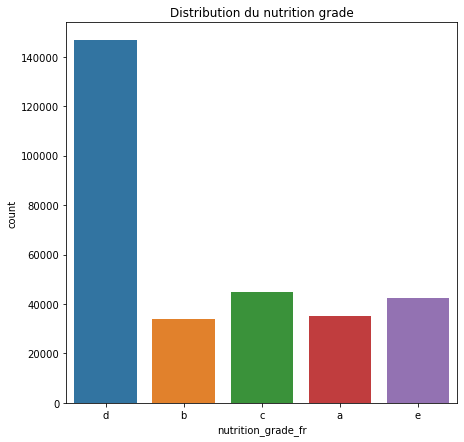

In [27]:
# distribution de la variable "nutrition_grade_fr"

plt.figure(figsize=(7,7))
sns.countplot(x=df['nutrition_grade_fr'])
plt.title('Distribution du nutrition grade')
plt.show()

J'aimerais examiner la distribution de la variable "nutrition_grade_fr" entre les pays. Mais puisque notre base de données a un grand nombre de valeurs pour la variable "countries", pour l'analyse j'utiliserai la base de données "df_no_nan", qui est sans valeurs manquantes.

In [28]:
df_no_nan['countries'].nunique()

62

In [29]:
df_no_nan=df_no_nan.replace(to_replace =['US','United States', 'États-Unis', 'en:US', 'France,Suisse,États-Unis,Canada','en:france, US', 'Singapore,New Zealand,Thailand,Australia, US',
                              'États-Unis, en:france, US', 'en:FR, US', 'France,United States', 'France, US', 'en:FR',
                              'Vereinigte Staaten von Amerika', 'Россия', 'en:US, US', 'France,Suisse', 'Canada, US', 
                               'Australia, US', 'en:GB, US', 'United States, en:france', 'France,États-Unis', 'en:france',
                              'Australia,United States', 'Pays-Bas, US', 'US,Switzerland', 'France,États-Unis,Suisse',
                               'en:MY, US', 'Saint-Pierre-et-Miquelon', 'Australia,Indonesia,United States', 'Suisse',
                              'en:AU, US', 'en:france, en:belgium', 'Spanien,Denmark, US', 'Belgium,United States,Switzerland',
                              'en:IT, US', 'United Kingdom, US', 'España, Estados Unidos', 'Canada,United States',
                              'en:NL, US', 'United States,Canada', 'France,Suisse,États-Unis', 'en:SG, US',
                              'Saint Pierre and Miquelon, en:france, en:belgium', 'Belgium, US', 'en:CA, US', 
                               'United States,Germany', 'España, US', 'Nederland, US', 'Frankrijk', 'Italia', 'Italia, US',
                              'Tunisie', 'en:EU, US', 'United states', 'Deutschland, US'],
                 value=['USA','USA', 'USA', 'USA', 'USA, France, Switzerland, Canada', 'USA, France',
                       'USA, Singapore, New Zealand, Thailand, Australia', 'USA, France', 'USA, France', 'USA, France', 
                        'USA, France','France', 'USA', 'Russia', 'USA', 'France, Switzerland', 'USA, Canada', 'USA, Australia',
                       'USA, Great Britain', 'USA, France', 'USA, France','France', 'USA, Australia', 'USA, Netherlands',
                       'USA, Switzerland','USA, France, Switzerland', 'USA', 'Saint Pierre and Miquelon',
                       'USA, Australia, Indonesia', 'Switzerland', 'USA, Australia', 'France, Belgium', 'USA, Spain, Denmark',
                       'USA, Belgium, Switzerland', 'USA, Italy', 'USA, Great Britain', 'USA, Spain', 'USA, Canada', 'USA, Netherlands',
                       'USA, Canada', 'USA, France, Switzerland', 'USA', 'Saint Pierre and Miquelon, France, Belgium',
                       'USA, Belgium', 'USA, Canada', 'USA, Germany', 'USA, Spain', 'USA, Netherlands', 'France', 'Italy',
                       'USA, Italy', 'Tunisia', 'USA','USA', 'USA, Germany'])

In [30]:
df_no_nan['countries'].unique()

array(['USA', 'Canada', 'USA, France, Switzerland, Canada', 'USA, France',
       'France', 'USA, Singapore, New Zealand, Thailand, Australia',
       'USA, Great Britain', 'USA, Netherlands', 'USA, Switzerland',
       'USA, France, Switzerland', 'USA, Spain, Denmark',
       'USA, Belgium, Switzerland', 'USA, Australia', 'USA, Canada',
       'USA, Italy', 'USA, Spain', 'Canada,France',
       'Saint Pierre and Miquelon', 'USA, Australia, Indonesia',
       'France, Switzerland',
       'Saint Pierre and Miquelon, France, Belgium', 'Switzerland',
       'United Kingdom', 'USA, Belgium', 'USA, Germany',
       'Belgium,France,Luxembourg,Switzerland', 'Russia', 'Tunisia',
       'Colombia', 'Italy', 'Hong Kong'], dtype=object)

Dans la base de données "df_no_nan", la variable "countries" a souvent les valeurs "USA", "France", "Canada", "Switzerland".  Par conséquent, je vais considérer ces pays.

In [31]:
df_usa=df_no_nan[(df_no_nan['countries']== 'USA')|(df_no_nan['countries'] =='USA, France, Switzerland, Canada')|
             (df_no_nan['countries'] == 'USA, France')|
             (df_no_nan['countries'] == 'USA, Singapore, New Zealand, Thailand, Australia')|
             (df_no_nan['countries'] =='USA, Great Britain')|
             (df_no_nan['countries'] =='USA, Belgium, Switzerland')|
             (df_no_nan['countries'] =='USA, Australia')|
             (df_no_nan['countries'] =='USA, Canada')|
             (df_no_nan['countries'] =='USA, Italy')|
             (df_no_nan['countries'] =='USA, Switzerland')|
             (df_no_nan['countries'] =='USA, Spain')|
             (df_no_nan['countries'] =='USA, Netherlands')|
             (df_no_nan['countries'] =='USA, France, Switzerland')|
             (df_no_nan['countries'] =='USA, Australia, Indonesia')|
             (df_no_nan['countries'] =='USA, Belgium')|
            (df_no_nan['countries'] =='USA, Germany')]
df_usa.head()
df_usa.shape

(128387, 16)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='count'>

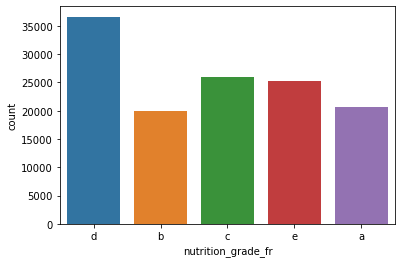

In [32]:
sns.countplot(x='nutrition_grade_fr', data=df_usa)

In [33]:
df_france=df_no_nan[(df_no_nan['countries'] == 'USA, France, Switzerland, Canada')|
                (df_no_nan['countries'] == 'USA, France')|
                (df_no_nan['countries'] == 'France')|
                (df_no_nan['countries'] == 'USA, France, Switzerland')|
                (df_no_nan['countries'] == 'France, Switzerland')|
                (df_no_nan['countries'] == 'Canada,France')]
df_france.shape

(102, 16)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='count'>

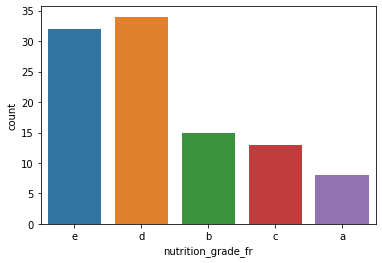

In [34]:
sns.countplot(x='nutrition_grade_fr', data=df_france)

In [35]:
df_canada=df_no_nan[(df_no_nan['countries'] == 'USA, France, Switzerland, Canada')|
                (df_no_nan['countries'] == 'Canada')|
                (df_no_nan['countries'] == 'USA, Canada')|
                (df_no_nan['countries'] == 'Canada,France')]
df_canada.shape

(126, 16)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='count'>

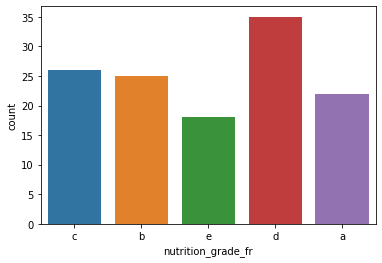

In [36]:
sns.countplot(x='nutrition_grade_fr', data=df_canada)

In [37]:
df_switz=df_no_nan[(df_no_nan['countries'] == 'USA, France, Switzerland, Canada')|
                (df_no_nan['countries'] == 'USA, Belgium, Switzerland')|
                (df_no_nan['countries'] == 'USA, Switzerland')|
                (df_no_nan['countries'] == 'USA, France, Switzerland')|
                (df_no_nan['countries'] == 'France, Switzerland')|
                (df_no_nan['countries'] == 'Switzerland')]
df_switz.shape

(14, 16)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='count'>

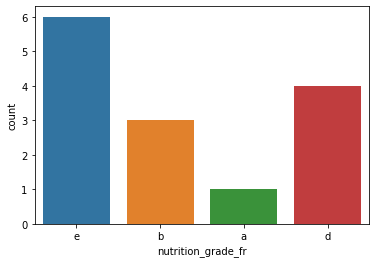

In [38]:
sns.countplot(x='nutrition_grade_fr', data=df_switz)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  302987 non-null  float64
 4   ingredients_from_palm_oil_n  302987 non-null  float64
 5   nutrition_grade_fr           302987 non-null  object 
 6   nutrition-score-fr_100g      302987 non-null  float64
 7   proteins_100g                302987 non-null  float64
 8   sugars_100g                  302987 non-null  float64
 9   fat_100g                     302987 non-null  float64
 10  saturated-fat_100g           302987 non-null  float64
 11  polyunsaturated-fat_100g     302987 non-null  float64
 12  vitamin-a_100g               302987 non-null  float64
 13 

In [28]:
# Pour une analyse efficace, nous changeons le type de la variable 'nutrition_grade_fr'

df['nutrition_grade_fr']=df['nutrition_grade_fr'].astype('category')
df['nutrition_grade_fr']=df['nutrition_grade_fr'].cat.codes

In [41]:
df['nutrition_grade_fr'].unique()

array([3, 1, 2, 0, 4], dtype=int8)

In [42]:
df_2=df.drop(['code', 'product_name', 'countries'], axis=1)

In [43]:
df_2.shape

(302987, 22)

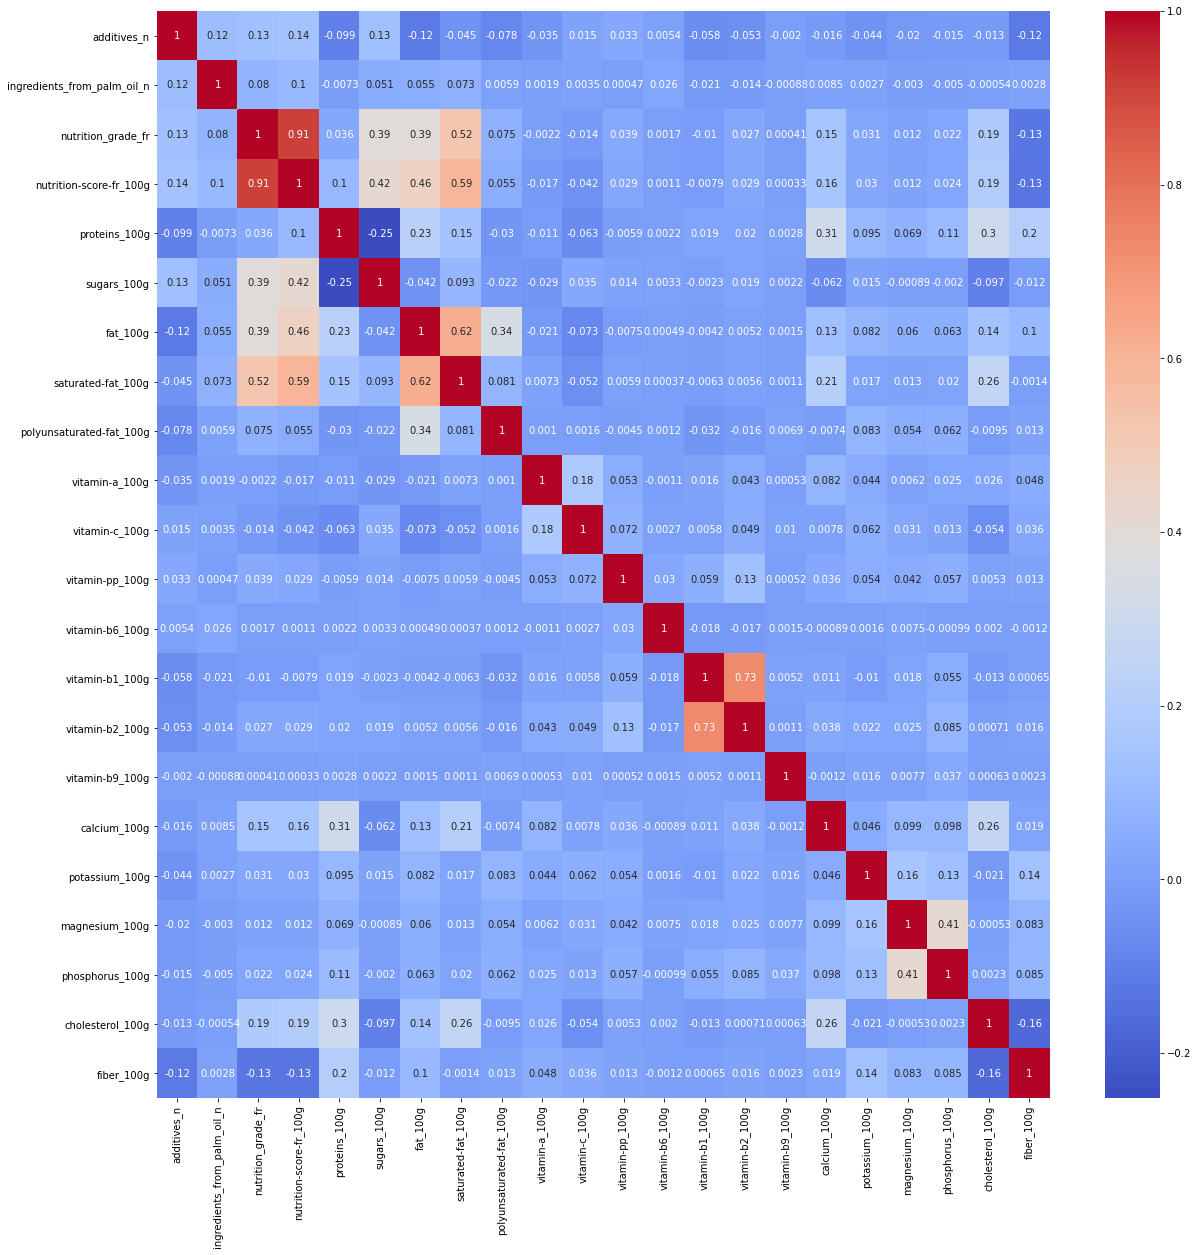

In [44]:
cor = df_2.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True,  cmap = 'coolwarm');


In [45]:
data_pca=df.drop(['code', 'product_name', 'countries'], axis=1)

In [46]:
# préparation des données pour l'ACP

X=data_pca.values
name=df['product_name']
features=df.columns

In [47]:
# Centrage et Réduction

std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=data_pca.columns, index=df['product_name'])
df_scaled.head()

,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,polyunsaturated-fat_100g,vitamin-a_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
product_name,,,,,,,,,,,,,,,,,,,,,
Farine de blé noir,9.821163e-17,2.786037e-17,0.483440,-2.310902e-16,5.544902e-14,1.267798e-14,4.944437e-14,-1.688593e-15,6.036246e-16,-3.237281e-15,...,-1.793670e-16,3.779490e-15,3.163689e-15,0.0,-4.598639e-14,5.756815e-16,-2.041950e-15,1.853287e-15,-2.158200e-14,-4.754713e-14
Banana Chips Sweetened (Whole),-8.570771e-01,-1.518677e-01,0.483440,6.307230e-01,-4.669401e-01,-8.909262e-02,1.018071e+00,3.430669e+00,6.036246e-16,-3.553299e-01,...,-1.793670e-16,3.779490e-15,3.163689e-15,0.0,-7.237532e-01,5.756815e-16,-2.041950e-15,1.853287e-15,-1.210630e-02,2.061705e-01
Peanuts,-8.570771e-01,-1.518677e-01,-1.180171,-1.190568e+00,1.435246e+00,9.964324e-02,3.311820e-01,-7.475537e-01,6.036246e-16,-3.553299e-01,...,-1.793670e-16,3.779490e-15,3.163689e-15,0.0,-1.890476e-01,5.756815e-16,-2.041950e-15,1.853287e-15,-6.907158e-01,1.147711e+00
Organic Salted Nut Mix,-8.570771e-01,-1.518677e-01,0.483440,3.705386e-01,1.435246e+00,-6.558289e-01,2.850415e+00,3.632006e-02,6.036246e-16,-3.237281e-15,...,-1.793670e-16,3.779490e-15,3.163689e-15,0.0,3.531891e-01,5.756815e-16,-2.041950e-15,1.853287e-15,-2.158200e-14,1.147711e+00
Organic Polenta,-8.570771e-01,-1.518677e-01,0.483440,-2.310902e-16,1.986254e-01,1.267798e-14,-7.225603e-01,-1.688593e-15,6.036246e-16,-3.237281e-15,...,-1.793670e-16,3.779490e-15,3.163689e-15,0.0,-4.598639e-14,5.756815e-16,-2.041950e-15,1.853287e-15,-2.158200e-14,7.710948e-01


In [48]:
df_scaled.shape

(302987, 22)

In [49]:
# Calcul des composantes principales

from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
X_projected = pca.fit_transform(X_scaled)
pd.DataFrame(X_projected, index=df['product_name'], columns=['F' + str(i+1) for i in range(10)] )

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
product_name,,,,,,,,,,
Farine de blé noir,0.233018,-0.093154,0.059978,0.026195,0.025563,-0.005274,-0.003627,-0.045467,-0.003514,0.031176
Banana Chips Sweetened (Whole),2.184945,0.001596,-0.123816,0.028375,-1.448737,-0.529533,0.156190,-0.230639,0.009736,0.312331
Peanuts,-1.406424,1.358691,-0.716464,0.073749,-0.866483,0.184301,-1.143745,-0.251749,0.055245,0.323212
Organic Salted Nut Mix,1.619729,1.709427,-1.078021,-0.243728,-1.261303,-0.443767,-0.790331,-0.101351,0.059294,0.159333
Organic Polenta,-0.091482,0.320978,-0.042171,0.084069,-0.147038,-0.195615,-0.414693,-0.533114,-0.000910,0.422859
...,...,...,...,...,...,...,...,...,...,...
Tomato & ricotta,0.233018,-0.093154,0.059978,0.026195,0.025563,-0.005274,-0.003627,-0.045467,-0.003514,0.031176
"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",-2.766311,-0.888993,0.273486,-1.529196,0.311035,0.943722,0.384279,-0.233756,-0.051206,0.298355
乐吧泡菜味薯片,0.233018,-0.093154,0.059978,0.026195,0.025563,-0.005274,-0.003627,-0.045467,-0.003514,0.031176


In [50]:
f1 = pca.components_[0]
print(f1)

[ 0.03506404  0.07448748  0.48199989  0.50654955  0.14204888  0.17266356
  0.38987152  0.44570552  0.10890146 -0.00197649 -0.04035161  0.02422706
  0.00275919  0.00151852  0.02358401  0.00265723  0.18795     0.05080737
  0.04893225  0.05785749  0.2094845  -0.0384443 ]


F1  est une combinaison linéaire des autres variables. Ici,

F1 = 
+ 0.03506404 * additives_n +
+ 0.07448748 * ingredients_from_palm_oil_n +
+ 0.48199989 * nutrition_grade_fr +
+ 0.50654955 * nutrition-score-fr_100g +
+ 0.14204888 * proteins_100g +
+ 0.17266356 * sugars_100g +
+ 0.38987152 * fat_100g +
+ 0.44570552 * saturated-fat_100g +
+ 0.10890146 * polyunsaturated-fat_100g -
+ 0.00197649 * vitamin-a_100g -
+ 0.04035161 * vitamin-c_100g +
+ 0.02422706 * vitamin-pp_100g +
+ 0.00275919 * vitamin-b6_100g +
+ 0.00151852 * vitamin-b1_100g +
+ 0.02358401 * vitamin-b2_100g +
+ 0.00265723 * vitamin-b9_100g + 
+ 0.18795 * calcium_100g +
+ 0.05080737 * potassium_100g +
+ 0.04893225 * magnesium_100g +
+ 0.05785749  * phosphorus_100g +
+ 0.2094845 * cholesterol_100g -
+ -0.0384443 * fiber_100g
 

Au passage, on voit, en regardant les coefficients, les variables qui contribuent le plus à F1:
+ nutrition-score-fr_100g
+ nutrition_grade_fr
+ fat_100g
+ saturated-fat_100g


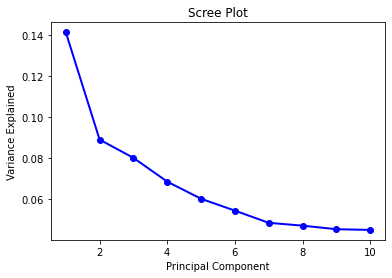

In [52]:
# Enfin, nous calculerons le pourcentage de la variance totale expliquée par chaque composante principale
# et utilisez matplotlib pour créer un scree plot :


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Eboulis des valeurs propres
# display_scree_plot(pca)

# Composants principaux 3-7

In [53]:
data=df_2.drop('nutrition_grade_fr', axis=1)

target=df_2['nutrition_grade_fr']

In [54]:
# Séparer les données en deux : un échantillon d'entraînement et de test. On prendra une répartition 80% sur
# les données d'entraînement et instancier une graine aléatoire à 1234. On nommera les jeux de données
# X_train, Y_train, X_test et Y_test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1234)

# Si vous ne mentionnez pas random_state dans votre code, chaque fois que vous exécutez votre code, 
# une nouvelle valeur aléatoire est générée et les ensembles de données d'entraînement et de test 
# auront des valeurs différentes à chaque fois.

# Cependant, si vous utilisez une valeur spécifique pour random_state (random_state = 1 ou toute autre valeur) à chaque fois,
# le résultat sera le même, c'est-à-dire les mêmes valeurs dans les jeux de données train et test

+ Une technique de preprocessing grossière consiste à supprimer les features de variance nulle d'un dataset : elles ne peuvent être d'aucune utilité.
+ Nous allons utiliser sklearn pour détecter les features de variance nulle.
+ Il est possible de visualiser les features supprimées à l'aide d'un graphique bicolore. La méthode get_support, implémentée sur tous les sélecteurs de variables, renvoie un tableau de booléens qui indique si une feature est conservée ou non. Ce tableau porte le nom de masque.

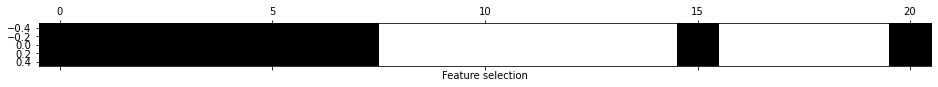

In [55]:
# Eliminer à l'aide VarianceThreshold toutes les variables explicatives qui ont une variance inférieure à 0.01.
# Transformer le jeu d'entraînement et stocker le dans une variable X_train_sel.
# Transformer le jeu de test et stocker le dans une variable X_test_sel.
# Afficher le masque du sélecteur.


from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.01)
X_train_sel = sel.fit_transform(X_train)
X_test_sel = sel.transform(X_test)

mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection');


In [56]:
print(X_train_sel.shape)

(242389, 10)


In [57]:
# Normaliser à l'aide de StandardScaler X_train et X_test.
# Normaliser à l'aide de StandardScaler X_train_sel et X_test_sel.

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train_sel = sc.fit_transform(X_train_sel)
X_test_sel = sc.transform(X_test_sel)

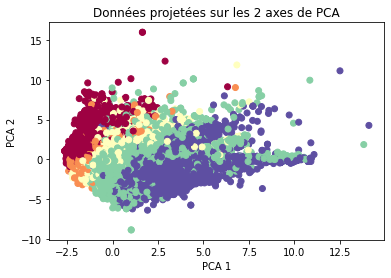

In [58]:
# Ajuster sur le jeu d'entraînement X_train_sel une PCA qui ne conserve que les 10 composantes principales.

# Stocker dans une nouvelle variable X_train_pca le résultat de cette transformation.

# À l'aide de matplotlib, tracer le nuage de points des données dans l'espace de dimension réduit, en coloriant
# les points en fonction de leur classe.

from sklearn.decomposition import PCA

pca=PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_sel)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();


In [59]:
# •Afficher la variance expliquée pour chaque composantes grâce à l'attribut explained_variance_ de PCA.

print('Les valeurs propres sont :', pca.explained_variance_)

Les valeurs propres sont : [2.36107298 1.64119984 1.20535532 1.01388952 0.99844011 0.8346289
 0.77718829 0.59744681 0.29702268 0.2737968 ]


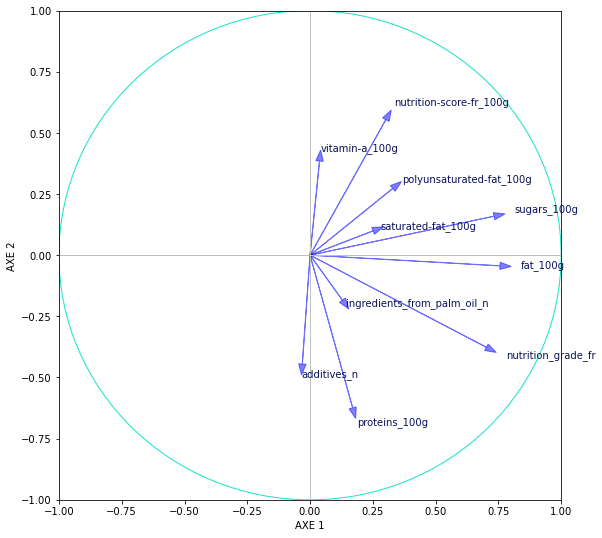

In [60]:
sqrt_eigval = np.sqrt(pca.explained_variance_)
corvar = np.zeros((10, 10))
for k in range(10):
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]
# corvar
fig, axes = plt.subplots(figsize=(9, 9))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# affichage des étiquettes (noms des variables)
for j in range(10):
    plt.annotate(df_2.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9,
              alpha=0.5, head_width=0.03, color='b')

# ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.show()

Les variables les plus corrélées à AXE 1 sont :
+ sugars_100g;
+ fat_100g;
+ nutrition_grade_fr.

Les variables les plus corrélées à AXE 2 sont :
+ nutrition-score-fr_100g;
+ vitamin-a_100g;
+ protein_100g (avec une corrélation négative);
+ addirives_n (avec une corrélation négative).

In [62]:
# Ajuster un classifieur k=3, k=5, k=8 plus proches voisins sur le jeu d'entrainement X_train et Y_train.
# Calculer le score de ce classifieur sur le jeu de test.

from sklearn import neighbors
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn3.score(X_test, y_test)

0.9326215386646424

In [63]:
from sklearn import neighbors
knn8 = neighbors.KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train, y_train)
knn8.score(X_test, y_test)


0.9250965378395326

In [64]:
from sklearn import neighbors
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.9299151787187696

In [65]:
# Transformer le jeu de test X_test_sel avec la PCA et stocker le résultat dans une variable X_test_pca.
# Ajuster un classifieur k plus proches voisins pour k=3 sur le jeu d'entrainement en dimension réduite.
# Calculer le score de prédiction sur le nouveau jeu de test.


X_test_pca = pca.transform(X_test_sel)
knn3.fit(X_train_pca, y_train)
knn3.score(X_test_pca, y_test)

0.9512360143899139

In [69]:
# Calculer et stocker dans une liste le score de prédiction du modèle en fonction du paramètre de réduction de
# la PCA. On calculera le score pour 1 a 10 .


list_score=[]
k=1
while k <=10:
    pca=PCA(n_components=k)
    X_train_pca1 = pca.fit_transform(X_train_sel)
    X_test_pca1 = pca.transform(X_test_sel)
    knn3.fit(X_train_pca1, y_train)
    list_score.append(knn3.score(X_test_pca1, y_test))
    k+=1

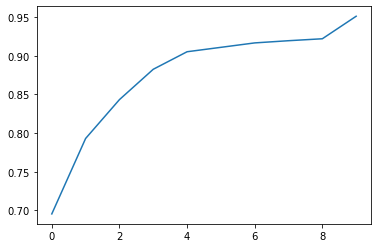

In [70]:
# Tracer la courbe de score de prédiction du modèle en fonction de l'évolution de la réduction de dimension.
plt.plot(list_score)

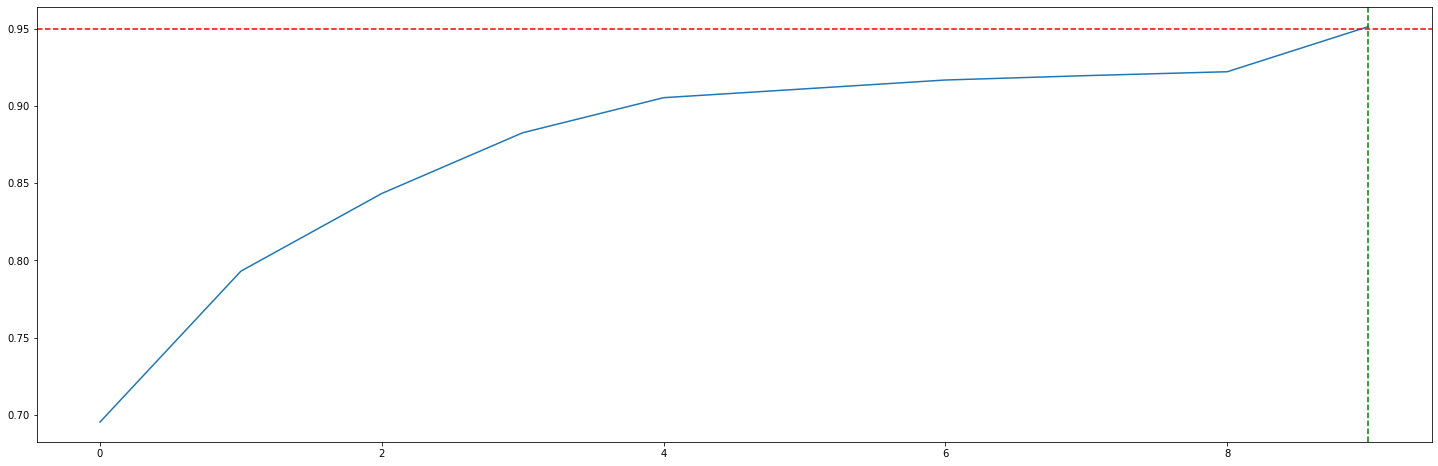

In [71]:
# Qu'elle est le score maximum et pour quelle réduction?

plt.figure(figsize = (25,8))

plt.plot(list_score);

plt.axhline(y = 0.95, color ='r', linestyle = '--')
plt.axvline(x=9, color ='g', linestyle = '--')


In [72]:
# Grouper les données en reproduisant un algorithme de classification mixte , à l'aide des étapes suivantes :

#   Appliquer l'algorithme des K-Means pour regrouper les données en 50 clusters.

from scipy.cluster.hierarchy import dendrogram, linkage

clf = KMeans(n_clusters = 50)
clf.fit(df_2)

centroids = clf.cluster_centers_
labels = clf.labels_

In [73]:
print(centroids)

[[2.59189023 0.00988105 2.80601596 ... 0.24924624 0.01395324 2.09459   ]
 [2.93370656 0.01084658 2.87231103 ... 0.25112536 0.00977676 2.61425217]
 [1.15624312 0.02067867 2.83420746 ... 0.25593464 0.01892303 5.58566844]
 ...
 [2.78690159 0.01948356 3.6605847  ... 0.25454719 0.04309724 1.54540674]
 [2.52440113 0.00874147 2.7136893  ... 0.24945231 0.00847842 3.28850659]
 [2.94800319 0.02511341 2.53112382 ... 0.25269253 0.01248561 3.33555808]]


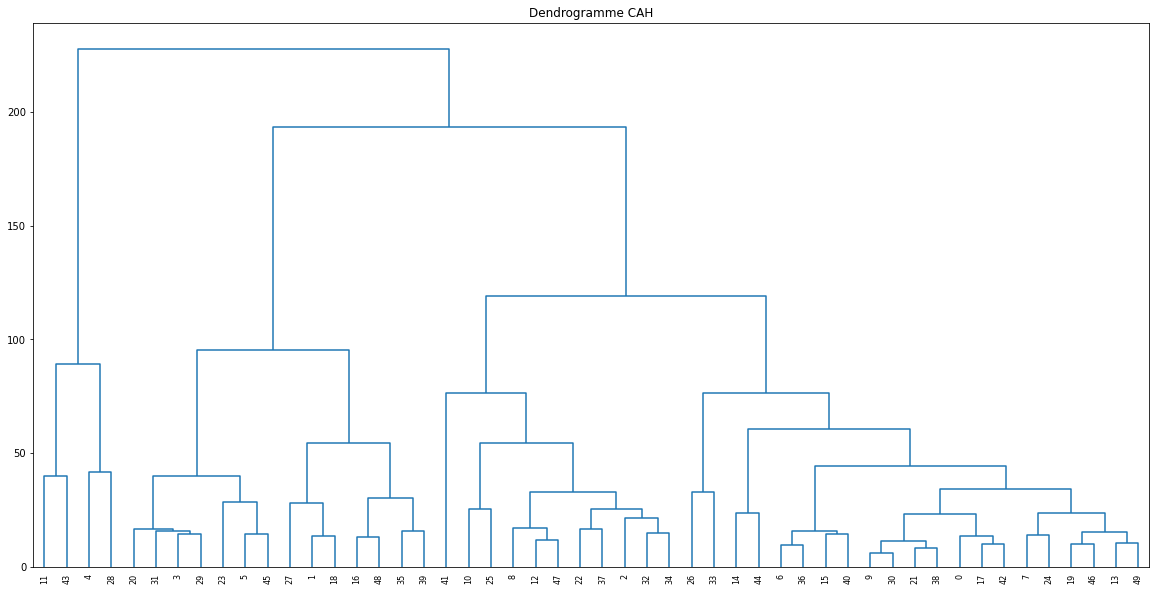

In [74]:
#   A partir des centres de gravité et labels obtenus pour chaque cluster, afficher un dendrogramme afin de choisir 
#   le nombre de clusters adéquat (>2).


plt.figure(figsize=(20, 10))
Z = linkage(centroids, method = 'ward', metric = 'euclidean')

plt.title("Dendrogramme CAH")
dendrogram(Z, leaf_rotation = 90., color_threshold =0)
plt.show()

In [75]:
#   Appliquer un algorithme de classification ascendante hiérarchique à partir des centres de gravité 
#   obtenus à l'étape 1 avec le nombre de clusters obtenu à l'étape 2.

# Le package sklearn.cluster implémente l'algorithme CAH. La fonction AgglomerativeClustering permet d'initialiser 
# un classificateur permettant d'appliquer cet algorithme. 

from sklearn.cluster import AgglomerativeClustering
classificateur = AgglomerativeClustering(n_clusters = 3)
classificateur.fit(centroids)
labels = classificateur.labels_

print(labels)

[0 2 0 2 1 2 0 0 0 0 0 1 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 2 1 2 0 2 0 0 0 2 0
 0 0 2 0 0 0 1 0 2 0 0 2 0]


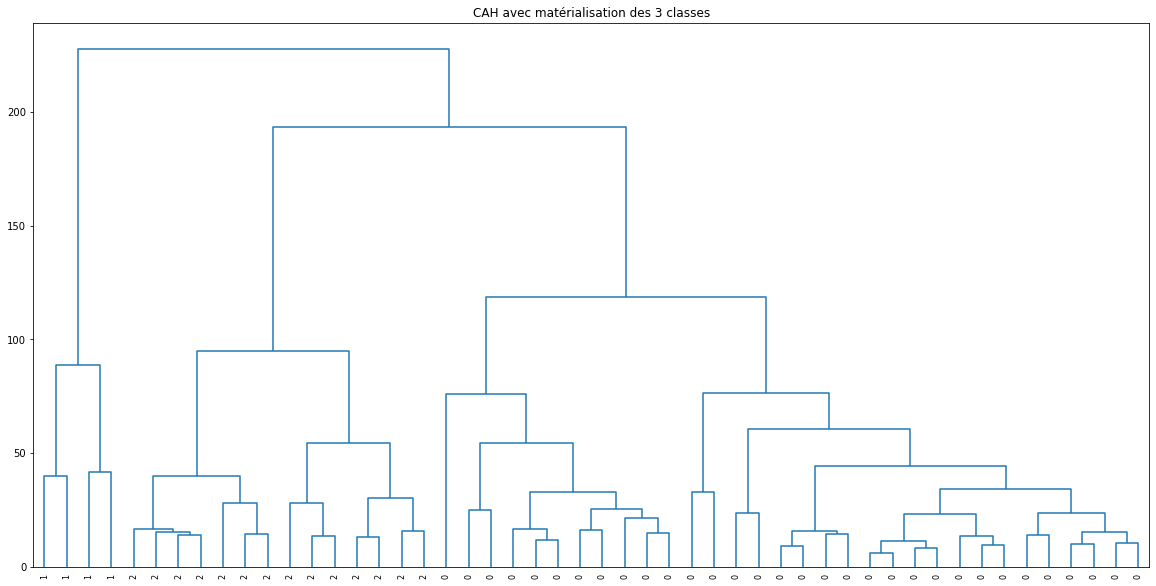

In [76]:
plt.figure(figsize=(20, 10))

k = linkage(centroids, method = 'ward', metric = 'euclidean')
plt.title('CAH avec matérialisation des 3 classes')
dendrogram(k, labels = labels, leaf_rotation = 90., color_threshold = 0)
plt.show()

In [77]:
df_centr = pd.DataFrame(centroids)
df_labels = pd.DataFrame(labels, columns =['labels'] )
df_big = pd.concat([df_centr, df_labels],  axis=1)

df_big.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,labels
0,2.591890,0.009881,2.806016,9.131681,0.392322,2.066346,0.437816,3.355071,6.212229,0.000231,...,0.225294,0.207285,0.000539,0.079558,0.281959,0.104444,0.249246,0.013953,2.094590,0
1,2.933707,0.010847,2.872311,11.973064,1.601628,62.741520,1.791589,1.643321,6.145592,0.000132,...,0.228036,0.209575,0.000658,0.071828,0.308477,0.105968,0.251125,0.009777,2.614252,2
2,1.156243,0.020679,2.834207,10.842215,13.819179,17.525253,30.105012,6.920906,6.472070,0.000208,...,0.227442,0.209862,0.000537,0.127319,0.314303,0.108981,0.255935,0.018923,5.585668,0
3,3.323354,0.063813,3.255045,16.526778,5.431734,33.274303,14.533837,5.511291,5.753558,0.000117,...,0.226223,0.209114,0.000561,0.077029,0.278988,0.105078,0.251429,0.018947,2.523282,2
4,0.201263,0.003633,3.093333,11.138954,0.400154,10.724446,94.059564,12.580538,11.080237,0.000153,...,0.228523,0.207626,0.000540,0.086462,0.287124,0.105571,0.251293,0.011106,2.169030,1


In [78]:
df_big.shape

(50, 23)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  302987 non-null  float64
 4   ingredients_from_palm_oil_n  302987 non-null  float64
 5   nutrition_grade_fr           302987 non-null  object 
 6   nutrition-score-fr_100g      302987 non-null  float64
 7   proteins_100g                302987 non-null  float64
 8   sugars_100g                  302987 non-null  float64
 9   fat_100g                     302987 non-null  float64
 10  saturated-fat_100g           302987 non-null  float64
 11  polyunsaturated-fat_100g     302987 non-null  float64
 12  vitamin-a_100g               302987 non-null  float64
 13 

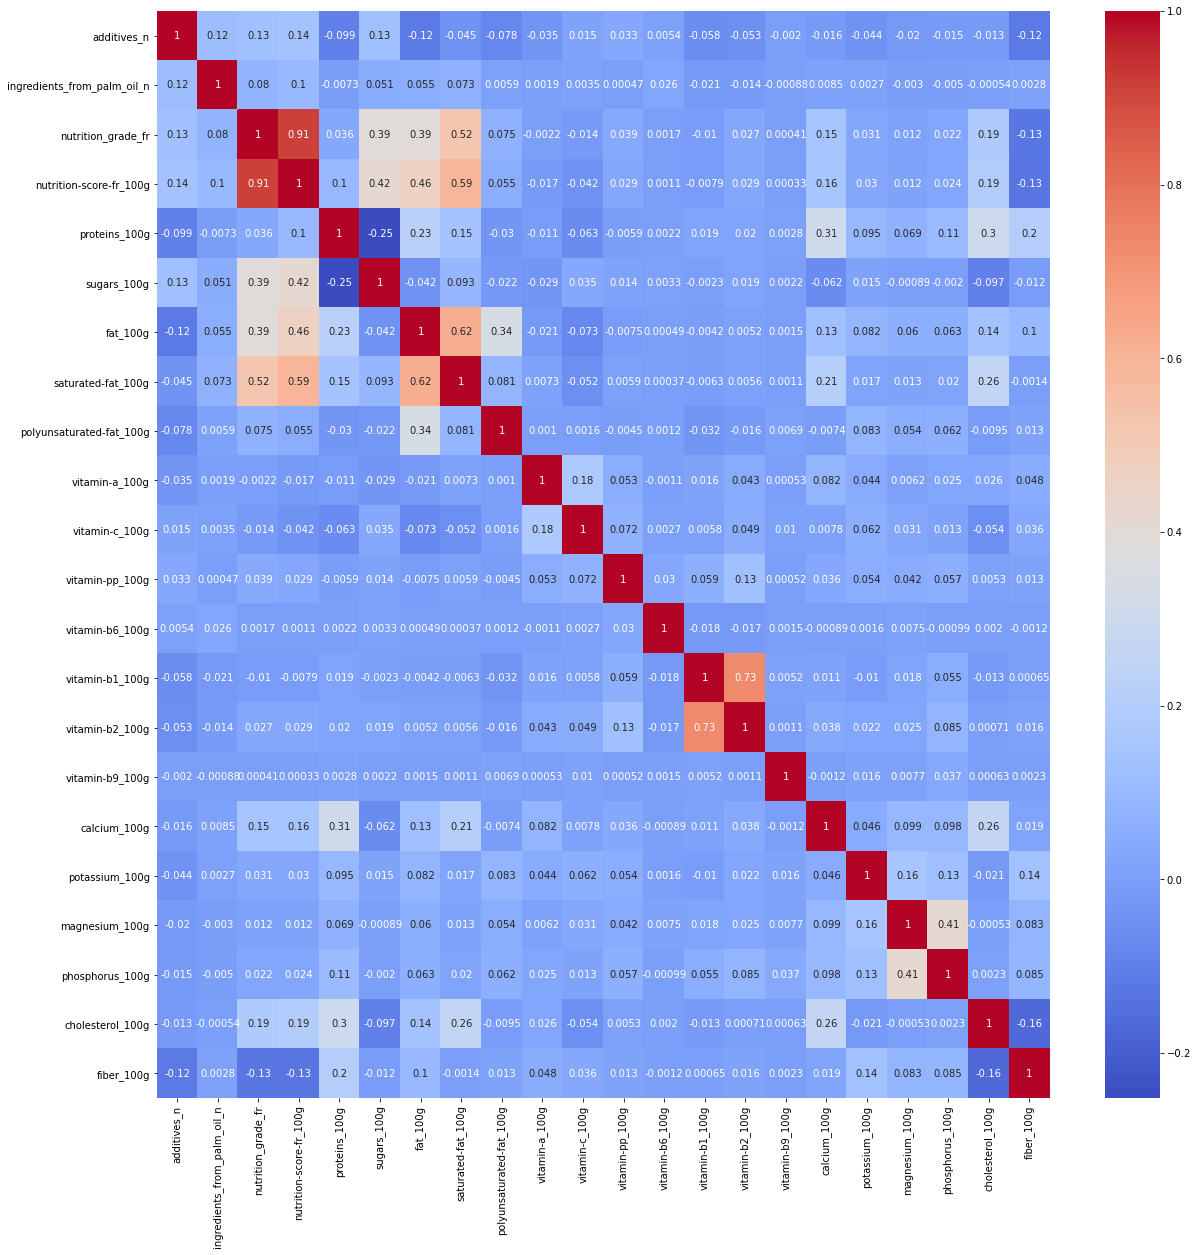

In [43]:
cor = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True,  cmap = 'coolwarm');

+ Analysez la corrélation entre deux variables quantitatives
+ La matrice de corrélation nous montre la forte corrélation entre plusieurs variables. Je ferai le diagramme de dispersion

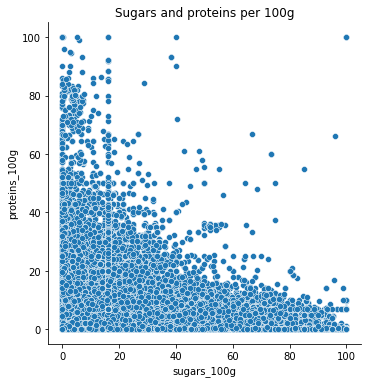

In [49]:
sns.relplot(x='sugars_100g', y='proteins_100g', data=df)
plt.title("Sugars and proteins per 100g")
plt.show()

# Corrélation négative : plus il y a de protéines, moins il y a de sucre.

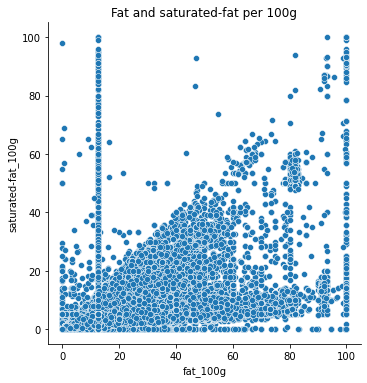

In [51]:
sns.relplot(x='fat_100g', y='saturated-fat_100g', data=df)
plt.title("Fat and saturated-fat per 100g")
plt.show()

# Corrélation positive : plus il y a de fat, plus il y a de saturated-fat. C'est logique.

+ Il nous faut un indicateur numérique qui puisse nous dire si les variables sont corrélées ou pas.
+ Ce coefficient  appelé coefficient de corrélation, ou coefficient de corrélation linéaire, ou encore coefficient de corrélation de Pearson.
+ Le coefficient de corrélation linéaire se calcule grâce à la méthode  st.pearsonr  . On lui donne ensuite les 2 variables à étudier. . Un couple de valeurs est renvoyé, le coefficient de corrélation est la premier élément de ce couple, d'où le  [0]  à la fin de la ligne 4.
+ La méthode  np.cov  renvoie la matrice de covariance.

In [53]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(df["sugars_100g"], df["proteins_100g"])[0])
print(np.cov(df["sugars_100g"],df["proteins_100g"],ddof=0)[1,0])

-0.2520164779785633
-35.81145036896844


In [54]:
print(st.pearsonr(df["fat_100g"], df["saturated-fat_100g"])[0])
print(np.cov(df["fat_100g"],df["saturated-fat_100g"],ddof=0)[1,0])

0.6202115514946372
66.12438450383557


+ Analysez une variable quantitative et une qualitative par ANOVA

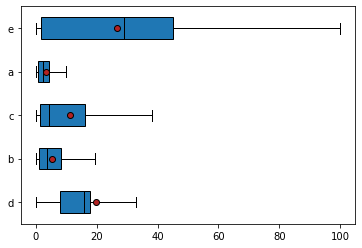

In [31]:
X = "nutrition_grade_fr" # qualitative
Y = "sugars_100g"    # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

On voit ici que la quantité de sucre sont  légèrement différents d'une catégorie à l'autre. Mais vérifions maintenant cette affirmation par les chiffres, grâce à une modélisation.

In [30]:
X = "nutrition_grade_fr" # qualitative
Y = "sugars_100g"    # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df[X],df[Y])

0.15964649254306795

On obtient un résultat proche de 0.15, ce qui laisse penser qu'il y a une corrélation faible entre le sugars et nutrition_grade. 

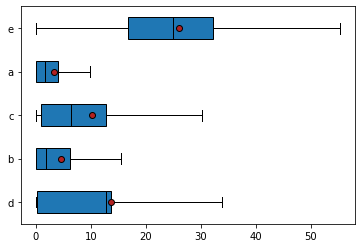

In [33]:
X = "nutrition_grade_fr" # qualitative
Y = "fat_100g"    # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [30]:
X = "nutrition_grade_fr" # qualitative
Y = "fat_100g" # quantitative

eta_squared(df[X],df[Y])

0.18095336607275472

On obtient un résultat proche de 0.2 ce qui laisse penser qu'il y a une corrélation faible entre le fat et nutrition_grade.

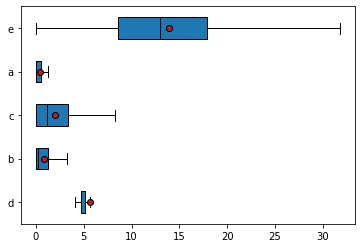

In [34]:
X = "nutrition_grade_fr" # qualitative
Y = "saturated-fat_100g"    # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [32]:
X = "nutrition_grade_fr" # qualitative
Y = "saturated-fat_100g" # quantitative

eta_squared(df[X],df[Y])

0.3626563752812963

On obtient un résultat proche de 0.4, ce qui laisse penser qu'il y a effectivement une corrélation entre le saturated-fat et nutrition_grade. C'est ce que nous avions observé sur le graphique (Matrice de corrélation).